In [51]:
# import the libraries as shown below
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [52]:
import urllib.request
import zipfile
import os

# Replace 'your_link_here' with the actual link to the zip file
zip_file_url = 'https://github.com/krishnaik06/Deep-Learning-Car-Brand/raw/master/Datasets.zip'
zip_file_name = 'Datasets.zip'

# Download the zip file
urllib.request.urlretrieve(zip_file_url, zip_file_name)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()



In [53]:
# List the contents of the extracted folder
extracted_folder_path = 'Datasets'  # Replace with the actual folder path
contents = os.listdir(extracted_folder_path)
print(contents)


['Test', 'Train']


In [54]:
# Set the target image size for the model
image_size = [224, 224]

# Define the directories containing training and test images
train_path = '/content/Datasets/Train'
valid_path = '/content/Datasets/Test'

# Create a ResNet50 model with pre-trained weights on ImageNet
resnet50 = ResNet50(input_shape=image_size + [3], weights='imagenet', include_top=False)
resnet50.summary()

# Freeze the weights of pre-trained layers in the ResNet50 model
for layer in resnet50.layers:
    layer.trainable = False

# Get the list of subdirectories (classes) within the training directory
folders = glob('/content/Datasets/Train/*')

# Add a Flatten layer to convert 3D output tensor to 1D tensor
x = Flatten()(resnet50.output)

# Add a Dense layer with softmax activation for classification
prediction = Dense(len(folders), activation='softmax')(x)

# Construct the final model by connecting the ResNet50 base and custom output layers
model = Model(inputs=resnet50.input, outputs=prediction)
model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [55]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [57]:
training_set = train_datagen.flow_from_directory('/content/Datasets/Train',
                                                 target_size=(224,224),batch_size=50,class_mode='categorical')


Found 64 images belonging to 3 classes.


In [58]:
test_set = train_datagen.flow_from_directory('/content/Datasets/Test',
                                                 target_size=(224,224),batch_size=32,class_mode='categorical')


Found 58 images belonging to 3 classes.


In [62]:
r=model.fit_generator(training_set,validation_data=test_set,epochs=50,validation_steps=len(test_set))

<ipython-input-62-bce03639e62b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set,validation_data=test_set,epochs=50,validation_steps=len(test_set))


Epoch 1/50
2/2 [==============================] - 2s 1s/step - loss: 11.6677 - accuracy: 0.3906 - val_loss: 3.2475 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 2s 2s/step - loss: 4.2688 - accuracy: 0.3750 - val_loss: 6.3970 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 2s 2s/step - loss: 4.4458 - accuracy: 0.4219 - val_loss: 3.0599 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 1.2063 - accuracy: 0.5781 - val_loss: 3.2110 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 2s 860ms/step - loss: 2.6863 - accuracy: 0.3906 - val_loss: 3.5924 - val_accuracy: 0.2414
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 2.3562 - accuracy: 0.4531 - val_loss: 2.0066 - val_accuracy: 0.3448
Epoch 7/50
2/2 [==============================] - 2s 868ms/step - loss: 1.4059 - accuracy: 0.5156 - val_loss: 2.5620 - val_accuracy: 0.5517
Epoch 8/50
2/2 [==================

In [63]:
r.history

{'loss': [11.667716979980469,
  4.268836498260498,
  4.445806503295898,
  1.206338882446289,
  2.6862564086914062,
  2.3561792373657227,
  1.4059367179870605,
  2.3761768341064453,
  1.307983636856079,
  1.3342335224151611,
  1.0459249019622803,
  0.9038716554641724,
  0.9326095581054688,
  1.0896427631378174,
  0.7263304591178894,
  0.9151452779769897,
  0.4928181767463684,
  0.8589092493057251,
  0.49756520986557007,
  0.7808560132980347,
  0.4168403744697571,
  0.6354363560676575,
  0.4172523021697998,
  0.44357186555862427,
  0.3876887559890747,
  0.3959934413433075,
  0.35361677408218384,
  0.34921711683273315,
  0.3375615179538727,
  0.3381083905696869,
  0.34916815161705017,
  0.370021253824234,
  0.2870011031627655,
  0.31023627519607544,
  0.28613314032554626,
  0.2905430793762207,
  0.29149216413497925,
  0.29802024364471436,
  0.2103126347064972,
  0.2658306658267975,
  0.28525856137275696,
  0.2242097705602646,
  0.265792578458786,
  0.2509899139404297,
  0.2518638372421264

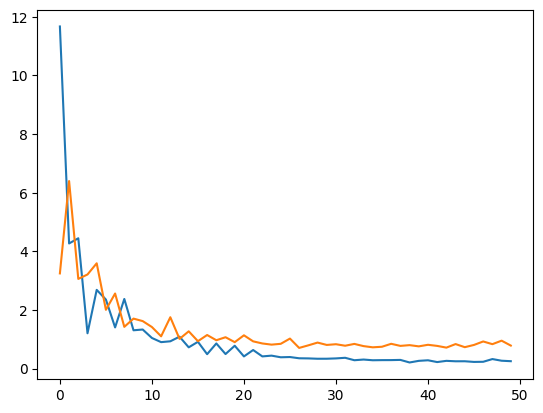

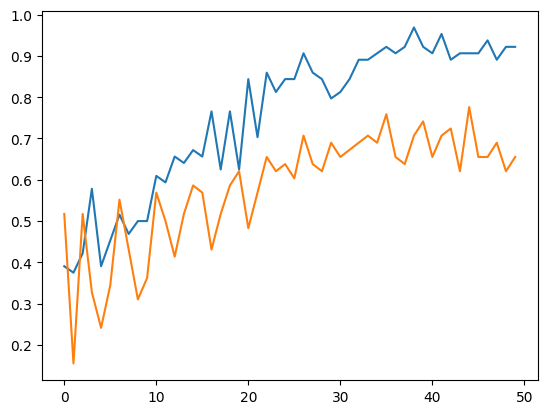

In [66]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.show()

plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.show()